# Mineria de Datos

> ## Conceptos

- **Supervisados**: Es por que hay algo que me ayuda  a supervisar a decir que si lo que se esta haciendo esta bien o lo esta haciendo mal, ese algo es la repuesta que biene con datos, es facil de saber si se esta equivocando de su decisión. Comparo con otras respuestas y llego a una respuesta.
    - **Clasificación**: Es cuando se va a predecir una categoria, tambien esta el reconocimiento de imagenes.
    - **Regresión**: Es cuando se va a predecir un numero que puede ser continuo. 
    
        **Ejemplo:** El valor de una casa, el valor de las ventas o compras.


- **No Supervisados**: Son aquellos que esa respuesta no viene, problemas de agrupamiento (Clientes buenos, malos y regulares), asociasiones entre datos 
    
    **Por ejemplo:** los que compran de noche compra huevos.


- **Reforzamiento**: Son los que van construyendo la data apartir de experiencia o interación que tienen con el medio ambiente.

    Se usa en juegos el va interactuando con los usuarios (Jugadores) las jugadas que son buenas tiene un premio y las que son malas son castigadas.
    
    Apartir de esas jugadas el va aprender de esas experiencias, como aprende el cuando cometio esa jugada sabe si es mala y puede evitarla.

### Fases Proyecto Machine Learning

- Definir objetivos.
- Obtener datos.
- Analisis exploratorios de los datos.
- Modelo.
- Ajustar el modelo.
- Hacer despliegue del modelo.

### Métodos de escalado de datos numéricos 

- **Normalización**: Es un cambio de escala de los datos del rango original para que todos los valores estén dentro del nuevo rango de **0** y **1**. 

  Requiere que conozca o sea capaz de estimar con precisión los valores observables mínimo y máximo. Es posible que pueda estimar estos valores a partir de sus datos disponibles.

  Un valor se normaliza de la siguiente manera: 

                      y = (x – min) / (max – min)
                      
  - Va dar **1** cuando x = max
  - Va dar **0** cuando x = min
  
  Donde los valores mínimo y máximo pertenecen al valor **x** que se está normalizando.

    **Por ejemplo**, para un conjunto de datos, podríamos estimar los valores observables mínimo y máximo como 30 y -10. Entonces podemos normalizar cualquier valor, como sigue:

                     y = (x - min) / (max - min)
                     y = (18,8 - (-10)) / (30 - (-10))
                     y = 28,8 / 40
                     y = 0,72 
  
  #### Se Usa: 
  
  from numpy import asarray from sklearn.preprocessing import MinMaxScaler
  
   data = asarray([[100, 0.001], [8, 0.05], [50, 0.005], [88, 0.07], [4, 0.1]]) print(data)
   
    scaler = **MinMaxScaler()**
    
    scaled = scaler.fit_transform(data) print(scaled)
    
 
- **Estandarización**: Un conjunto de datos implica reescalar la distribución de valores para que la **media** de los valores observados sea **0** y la **desviación** estándar sea **1**. 

    Esto se puede considerar restar el valor medio o centrar los datos.

    Al igual que la normalización, la estandarización puede ser útil e incluso necesaria en algunos algoritmos de aprendizaje automático cuando sus datos tienen valores de entrada con diferentes escalas.

    La estandarización supone que sus observaciones se ajustan a una distribución gaussiana (curva de campana) con una media y una desviación estándar de buen comportamiento. Aún puede estandarizar sus datos si no se cumple esta expectativa, pero es posible que no obtenga resultados confiables. 
    
    Un valor se estandariza de la siguiente manera:
    
                    y = (x – mean) / standard_deviation
           
    Donde la media se calcula como:
                
                    mean = sum(x) / count(x)
                    
    Y la desviación estándar se calcula como: 
    
          standard_deviation = sqrt( sum( (x – mean)^2 ) / count(x))
    
    **Por ejemplo**: Podemos estimar una media de 10.0 y una desviación estándar de aproximadamente 5.0. Usando estos valores, podemos estandarizar el primer valor de 20,7 de la siguiente manera: 
    
                    y = (x – mean) / standard_deviation
                    y = (20.7 – 10) / 5
                    y = (10.7) / 5
                    y = 2.14
                    
    Las estimaciones de la desviación estándar y media de un conjunto de datos pueden ser más robustas para los datos nuevos que el mínimo y el máximo.

    Puede estandarizar su conjunto de datos utilizando el objeto scikit-learn StandardScaler. 
    
    ### Se usa:
    from numpy import asarray from sklearn.preprocessing import StandardScaler

    data = asarray([[100, 0.001], [8, 0.05], [50, 0.005], [88, 0.07], [4, 0.1]]) print(data)

    scaler = **StandardScaler()**

    scaled = scaler.fit_transform(data) print(scaled)

> ## Instalaciones

In [ ]:
conda install matplotlib

> ## Importaciones

In [60]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

## GRAFICAR LA CORRELACIÓN
import seaborn as sns

## CONVERTIDOR
from sklearn.preprocessing import LabelEncoder

## NORMALIZACIÓN Y ESTADARIZACIÓN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

> # Funciones

### Elimina una categoria de una columna categorica.

In [46]:
def createDummies(df, var_name):
    dummy = pd.get_dummies(df[var_name], prefix=var_name, drop_first=True)
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df, dummy], axis = 1)
    return df

### Convierte  DataFrame Categorico a 1 o 0

Permite convertir:
- Yes: 1
- No: 0

In [55]:
def convertLabelEncoderZeroOrOne(y):
    sc_y = LabelEncoder()
    sc_y.fit(y)
    y = sc_y.transform(y)
    return y

### Concatenar DataFrame

In [116]:
def concatDataFrames(df, df2, cols):
    df = df.drop(columns = cols)
    df = pd.concat([df, df2], axis= 1)
    return df

### Calcular IQR

In [138]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

> # Ejercicio Compra o No Compra

## Cargar DataSet

In [151]:
df = pd.read_csv("data/01-data.csv")

Para saber si leyo el archivo

In [152]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


La función **head()** permite visualizar los 5 primeras entradas.

In [153]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


La función **info()** permite conocer:
- Posición de la columna
- Nombre columna
- Numeros de entradas
- Tipo de dato
- Valores no nulos

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


Conocer la cantidad de filas y columnas se usa **shape**

In [156]:
df.shape

(10, 4)

Conocer la valor de la media, min, max, 50% y otros con la función **describe** de los valores numericos

In [157]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


## Analizando

In [119]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### Conocer Categorias

Las columnas **categoricas** hay que convertirlas **numerico**.

Las columnas categoricas son:
- Country: Tiene tres categorias: 
    - France
    - Spain
    - Germany
- Purchased: Tiene dos categorias:
    - No
    - Yes

Para conocer el numero de categorias de una columna:
- Se selecciona el dataset.
- Se selecciona la columna.
- Se usa el metodo **value_counts()**.

#### Metodo Conocer Categorias

In [89]:
df.Country.value_counts()

France     4
Spain      3
Germany    3
Name: Country, dtype: int64

Otra forma es necesaria cuando el nombre de la columna tiene espacios.

In [90]:
df["Purchased"].value_counts()

No     5
Yes    5
Name: Purchased, dtype: int64

### Conocer Valores Nulos

Las columnas que tenga valores nulos hay que quitar esos valores nulos:
- Age
- Salary

#### Metodo Conocer Valores Nulos

Para conocer los valores nulos de una columna:
- Se selecciona el dataset.
- Se selecciona la columna.
- Se usa el metodo **isnull()** o **isna()**.

In [91]:
df.Age.isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
Name: Age, dtype: bool

o

In [92]:
df.Age.isna()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
Name: Age, dtype: bool

Para conocer la cantidad de nulos: 
- Se selecciona el dataset.
- Se selecciona la columna.
- Se usa el metodo **isnull().sum()** o **isna().sum()**

In [93]:
df.Age.isnull().sum()

1

o

In [94]:
df.Age.isna().sum()

1

### Llenar valores nulos

Para llenar los valores nulos se puede usar:
- La formula de la media.
- El metodo valor anterior.
- El metodo valor despues.
- Valor especifico.

#### La formula de la media

In [95]:
df["Age"].fillna(df["Age"].mean())

0    44.000000
1    27.000000
2    30.000000
3    38.000000
4    40.000000
5    35.000000
6    38.777778
7    48.000000
8    50.000000
9    37.000000
Name: Age, dtype: float64

#### El metodo valor anterior

In [96]:
df["Age"].fillna(method="backfill")

0    44.0
1    27.0
2    30.0
3    38.0
4    40.0
5    35.0
6    48.0
7    48.0
8    50.0
9    37.0
Name: Age, dtype: float64

#### El metodo valor despues

In [97]:
df["Age"].fillna(method="ffill")

0    44.0
1    27.0
2    30.0
3    38.0
4    40.0
5    35.0
6    35.0
7    48.0
8    50.0
9    37.0
Name: Age, dtype: float64

#### Valor especifico

Se va a llenar los nulos con el valor 30

In [98]:
df["Age"].fillna(30)

0    44.0
1    27.0
2    30.0
3    38.0
4    40.0
5    35.0
6    30.0
7    48.0
8    50.0
9    37.0
Name: Age, dtype: float64

### Asignando valor del llenado valores nulos

Se pueden hacer de dos formas:
- Asignandolo
- Inplace= True

#### Asignandolo

In [120]:
df["Age"]= df["Age"].fillna(df["Age"].mean())
df["Age"]

0    44.000000
1    27.000000
2    30.000000
3    38.000000
4    40.000000
5    35.000000
6    38.777778
7    48.000000
8    50.000000
9    37.000000
Name: Age, dtype: float64

#### Inplace= True

In [121]:
df["Salary"].fillna(method="ffill", inplace=True)
df["Salary"]

0    72000.0
1    48000.0
2    54000.0
3    61000.0
4    61000.0
5    58000.0
6    52000.0
7    79000.0
8    83000.0
9    67000.0
Name: Salary, dtype: float64

Despues se verifica que esta lleno **info()**.

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        10 non-null     float64
 2   Salary     10 non-null     float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


### Eliminar las categoricas

Primero se va a guardar la columna **Purchased** en una variable **y** con el objetivo de convertirla a numerica.

In [123]:
y = df["Purchased"]
y

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object

#### Eliminar una o varias columna 

Se usa el metodo **drop()**:
- Eliminar una: se le indica la columna **drop(columns="Columna")**.
- Eliminar mas de una: se le indica en una lista en numero de columnas a eliminar **drop(columns=["Columna A", "Columna B"])**.

In [124]:
df.drop(columns="Purchased", inplace=True)
df

,Country,Age,Salary
0,France,44.000000,72000.0
1,Spain,27.000000,48000.0
2,Germany,30.000000,54000.0
3,Spain,38.000000,61000.0
4,Germany,40.000000,61000.0
5,France,35.000000,58000.0
6,Spain,38.777778,52000.0
7,France,48.000000,79000.0
8,Germany,50.000000,83000.0
9,France,37.000000,67000.0


- Son los datos para el resultados, los que son supervisados van a quedar en la **y**.
- En las **x** van a quedar lo que yo voy a predecir.

### Correlación 

Se debe mirar que no haya relación entre las variables

Para saber si hay correlación entre variables se usa el metodo **corr()**.

Se dice que hay correlación cuando el valor es muy cercano a **1**.

In [125]:
df.corr()

,Age,Salary
Age,1.000000,0.905472
Salary,0.905472,1.000000


Se dice que entre mas edad hay mas salario.

### Graficar la Correlación


<AxesSubplot:>

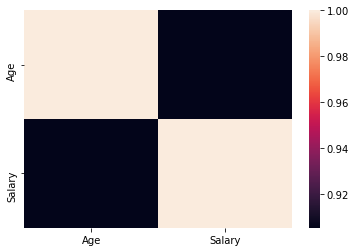

In [126]:
correlacion = df.corr()
sns.heatmap(correlacion)

### Graficar Histograma columnas

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

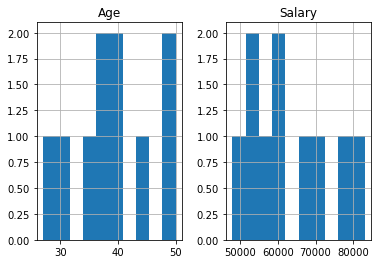

In [127]:
df.hist()

In [128]:
df= createDummies(df, "Country")
df

,Age,Salary,Country_Germany,Country_Spain
0,44.000000,72000.0,0,0
1,27.000000,48000.0,0,1
2,30.000000,54000.0,1,0
3,38.000000,61000.0,0,1
4,40.000000,61000.0,1,0
5,35.000000,58000.0,0,0
6,38.777778,52000.0,0,1
7,48.000000,79000.0,0,0
8,50.000000,83000.0,1,0
9,37.000000,67000.0,0,0


### Convertir la "Y" en numerica

Para convertir la y en numerica se uso la función **convertLabelEncoderZeroOrOne(df)** que retorna un array convertido el dataframe categorico a numerico.

In [129]:
y = convertLabelEncoderZeroOrOne(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### Normalizando Y Estandarizando

#### Normalizando

In [130]:
data = df[["Age", "Salary"]]
data

,Age,Salary
0,44.000000,72000.0
1,27.000000,48000.0
2,30.000000,54000.0
3,38.000000,61000.0
4,40.000000,61000.0
5,35.000000,58000.0
6,38.777778,52000.0
7,48.000000,79000.0
8,50.000000,83000.0
9,37.000000,67000.0


In [131]:
trans = MinMaxScaler()
data = trans.fit_transform(data)
data

array([[0.73913043, 0.68571429],
       [0.        , 0.        ],
       [0.13043478, 0.17142857],
       [0.47826087, 0.37142857],
       [0.56521739, 0.37142857],
       [0.34782609, 0.28571429],
       [0.51207729, 0.11428571],
       [0.91304348, 0.88571429],
       [1.        , 1.        ],
       [0.43478261, 0.54285714]])

#### Estandarizando

In [132]:
data = df[["Age", "Salary"]]
data

,Age,Salary
0,44.000000,72000.0
1,27.000000,48000.0
2,30.000000,54000.0
3,38.000000,61000.0
4,40.000000,61000.0
5,35.000000,58000.0
6,38.777778,52000.0
7,48.000000,79000.0
8,50.000000,83000.0
9,37.000000,67000.0


In [133]:
trans = StandardScaler()
data = trans.fit_transform(data)
data

array([[ 0.75887436,  0.77256767],
       [-1.71150388, -1.40879986],
       [-1.27555478, -0.86345798],
       [-0.11302384, -0.22722578],
       [ 0.17760889, -0.22722578],
       [-0.54897294, -0.49989673],
       [ 0.        , -1.04523861],
       [ 1.34013983,  1.40879986],
       [ 1.63077256,  1.77236112],
       [-0.25834021,  0.3181161 ]])

Si se suma debe dar **0**

Y la desbiación debe dar **1** que tanto se aleja.

#### Convertir Array a DataFrame

Se usa la función **DataFrame(df)**

In [134]:
data =pd.DataFrame(data, columns= ["Age_std", "Salary_std"])
data

,Age_std,Salary_std
0,0.758874,0.772568
1,-1.711504,-1.408800
2,-1.275555,-0.863458
3,-0.113024,-0.227226
4,0.177609,-0.227226
5,-0.548973,-0.499897
6,0.000000,-1.045239
7,1.340140,1.408800
8,1.630773,1.772361
9,-0.258340,0.318116


#### Concatenar DataFrames

In [136]:
df= concatDataFrames(df, data, ["Age", "Salary"])
df

,Country_Germany,Country_Spain,Age_std,Salary_std
0,0,0,0.758874,0.772568
1,0,1,-1.711504,-1.408800
2,1,0,-1.275555,-0.863458
3,0,1,-0.113024,-0.227226
4,1,0,0.177609,-0.227226
5,0,0,-0.548973,-0.499897
6,0,1,0.000000,-1.045239
7,0,0,1.340140,1.408800
8,1,0,1.630773,1.772361
9,0,0,-0.258340,0.318116


Solo los campos categoricos son los que dejamos, ya que con esos valores podemos predecir.

## Valores Atípicos

![alt text](https://ichi.pro/assets/images/max/724/1*wz--poSokEehPaqt6Kyxmw.png)

Estos valores se deben eliminar, estos valores son:
- Los que estan por debajo del valor minimo

    **Q1 - 1.5 x IQR**
    
    
- Los que estan por encima del valor maximo

    **Q3 + 1.5 x IQR**
    


### Rango intercuartil (IQR)

Es la resta de **Q3 - Q1**

**La mediana:** Es donde el **50%** estan por debajo de el y **50%** estan por encima de el.
 - **Impar**: mitad + 1
 - **Par**: (mitad_1 + mitad_2) / 2 
 
Entonces:
 - **Q1**: **25%** por debajo mitad.
 - **Q3**: **25%** por encima mitad.
    

In [142]:
data

,Age_std,Salary_std
0,0.758874,0.772568
1,-1.711504,-1.408800
2,-1.275555,-0.863458
3,-0.113024,-0.227226
4,0.177609,-0.227226
5,-0.548973,-0.499897
6,0.000000,-1.045239
7,1.340140,1.408800
8,1.630773,1.772361
9,-0.258340,0.318116


### Probando Función IQR

In [143]:
df_aux = df
df_aux

,Country_Germany,Country_Spain,Age_std,Salary_std
0,0,0,0.758874,0.772568
1,0,1,-1.711504,-1.408800
2,1,0,-1.275555,-0.863458
3,0,1,-0.113024,-0.227226
4,1,0,0.177609,-0.227226
5,0,0,-0.548973,-0.499897
6,0,1,0.000000,-1.045239
7,0,0,1.340140,1.408800
8,1,0,1.630773,1.772361
9,0,0,-0.258340,0.318116


In [148]:
get_iqr_text(df_aux, "Salary_std")

'median=-0.23, q1=-0.77, q3=0.66, iqr=1.43, minimum=-2.92, maximum=2.81'

### Graficar IQR

C:\Users\SerBuitrago2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


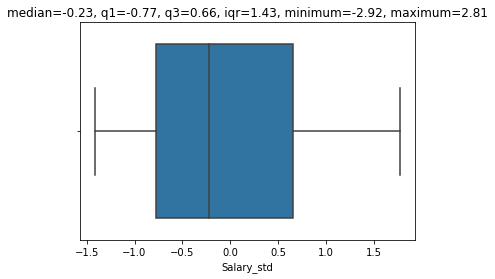

In [149]:
box_and_whisker(df_aux, "Salary_std")